## Visualising Malware Trends 
### Context
- **Malware** are executable programs written with malicious intent by threat actors trying to get foothold on networks 
<img src="malware.jpg" width="300">
- Examples of malware include, virus, worms, trojans, ransonware, spyware etc 
- Data science became critically important for cybersecurity in the recent years
    - security is all about data 
    - historically security professionals used rule based heuristics but this approach doesn't scale well
    - number of cyber attacks seems to be growing exponentially: 
        - 2008: 1 million malware executables known 
        - 2012: 100 million 
        - 2018: 1000 million 
      Source: https://www.av-test.org/en/statistics/malware/
    - rule based systems are unfeasible to hand ever growing number of threats
- Data contains the results of running 57 separate antivirus engines against approximately 38k malware files (data obtained from www.virustotal.com, coutery of Josh Saxe et al)

### Goals:  
- Discuss the relative efficacy of commercial antivirus systems at detecting malware
- Find out if there are prevalent malware families trending over time and connect this information with other sources of information (e.g. news outlets etc)

### Questions: 
1. Is the antivirus industry's ability to detect ransomware improving?
Hint: Visualisation of ransomware detections over time
2. Which types of malware have trended over the period of year? 
Hint: Visualisation of per-family malware detections over time 
3. Based on your findings, is there a niche opportunity in the AV industry for malware of a certain size range? 

<!-- <img src="karpersky.jpg" width="300"> -->

## Pandas and Matplotlib 101
### Loading Data into pandas
```python
import pandas as pd
data = [{'col1': 1, 'col2': 2}, {'col1': 3, 'col2': 4}] # 1
table = pd.DataFrame(data) # 2
```
The mechanics is: (1) once you have created a list of dictionaries, we pass it to the `DataFrame` constructor. The keys `col1, col2` will become column names for the resulting `DataFrame` object and can be retrieved by `table.columns` . You can also load data from external CSV files using the following command 
```python
table = pd.read_csv("/path/foo.csv")
```

#### Exercise 1: Load the malware dataset

In [1]:
# your code here 
import pandas as pd
malware = pd.read_csv('malware_data.csv') 

### Working with the `pandas` building block: the `DataFrame`
The first step towards understanding the content of a dataset is to compute some descriptive statistics of the numerical features, and look at the distribution of categorical features. 
There are two useful dataframe methods for both numerical and categorical features:

In [2]:
# the option include guarantees that all features are summarised
malware.describe(include='all')

,positives,size,type,fs_bucket
count,37511.000000,3.751100e+04,33675,37511
unique,NaN,NaN,5,228
top,NaN,NaN,trojan,2016-06-30 00:00:00
freq,NaN,NaN,16989,1369
mean,39.446536,1.300639e+06,NaN,NaN
std,15.039759,3.006031e+06,NaN,NaN
min,3.000000,3.370000e+02,NaN,NaN
25%,32.000000,1.653960e+05,NaN,NaN
50%,45.000000,4.828160e+05,NaN,NaN
75%,51.000000,1.290056e+06,NaN,NaN


In [3]:
malware.shape

(37511, 4)

In [4]:
malware.head()

,positives,size,type,fs_bucket
0,45,251592,trojan,2017-01-05 00:00:00
1,32,227048,trojan,2016-06-30 00:00:00
2,53,682593,worm,2016-07-30 00:00:00
3,39,774568,trojan,2016-06-29 00:00:00
4,29,571904,trojan,2016-12-24 00:00:00


In [5]:
# Try calculating what is the time window of the present dataset 
malware['fs_bucket'].min(), malware['fs_bucket'].max()

('2016-06-01 00:00:00', '2017-01-14 00:00:00')

For categorical features, the `.describe` method will output `unique, top, freq` and for numerical features `mean, std, min, max` and the quantiles. 

#### Exercise 2: slice and dice the data  
a) Compute the average number of times malware of type *trojan* was identified by the group of anti-virus (AV) softwares used in the study. Do the same for other malware types. For which class of malware our group of AV programs is most effective against? 

b) Now compute the average number of detections over the entire population for incresing sizes of files. Start with files of size 1 million and gradually increase the size (in increments of 1 million too). What do you observe? 

The general method for filtering data in pandas is to use filters, or *masks*. 

In [9]:
import numpy as np
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
m = df % 3 == 0
df.where(cond=m, other=-df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


### Plotting the Relationship Between Malware Size and Vendor Detections
Let's walk through the steps on how to generate the following figure in Python:
<img src="num_detections-vs-size.png" width="400">

```python
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
# https://matplotlib.org/api/pyplot_api.html
av_tot = 57
x = malware['size'] # (1)
y = malware['positives'] # (2)
plt.scatter(
    x,
    y,
    alpha=0.01, # (3)
    color='blue', # (4.1)
    marker='o' # (4.2)
)
plt.xscale('log') # (5)
plt.ylim([0, av_tot])
plt.xlabel('File size in bytes (log base-10)')
plt.ylabel('Number of detections')
plt.title('Number of Antivirus Detections vs File Size')
plt.show() # (6)
```
Let us walk through each line of code: 
1. x-coordinates, malware size 
2. y-coordinates, number of positive detections
3. `alpha`, or opacity, is gauged small so we can see how sense the data is within different regions
4. style parameters: color and type or markers (in our case, circles)
5. scale of x-axis: we have chosen a logarithmic scale
6. display of plot 
We could have replaced `plt.show()` with `plt.savefig('plotname.png')` so we can reuse it in a presentation.

#### Exercise 3: from pictures to words
Describe in a few sentences what you observe in the figure. 

#### Exercise 4: visual display of quantitative information
How does your interpretation above change if you:
1. use a linear scale instead? 
2. decrease the transparency (or increase the opacity)? 
Meaningful data visualisation requires thought and proper design thinking. To learn more about the subject, read anything from Ed Tufte
http://www.librarything.com/work/7983/reviews/138088850

#### Exercise 5a): plotting ransomware and worm detection rates over time
Plot now both ransomware and worm malware detection rates over time. 

*Hint*: Consider using a legend for your plot.

*Hint*: For this exercise you may want to use the pandas API to parse datetimes. 
```python
table = pd.read_csv('malware_data.csv', 
                    sep=',', 
                    parse_dates=['fs_bucket'],
                    index_col = 'fs_bucket'
                   )
table.index = table.index.tz_localize('UTC').tz_convert('GMT+0')
table.head()
```
We had to go the trouble of creating an index, and converting the index into timestamps since 
`tz_localize/tz_convert` act on the INDEX of the DataFrame, not on the values. Another more elementary solution, involves the native `dateutil` library: 
```python
from dateutil import parser, tz
LDN=tz.gettz("Europe/London")
table = pd.read_csv('malware_data.csv')
table['fs_bucket'] = malware['fs_bucket'].apply(lambda x: parser.parse(x).replace(tzinfo=LDN))
table['fs_bucket'].head()
```
The decision of which method to use is yours. My advice is, do not mix datetime parsers throughout your project. BE CONSISTENT and stick to ONE CONVENTION. Also, always specify the timezone of a timestamp. Otherwise... hear up a cautionary tale here: 
https://www.youtube.com/watch?v=-5wpm-gesOY

#### Exercise 5b): 
Plot the relative frequency of occurence of the different malware families over a period of 6 months. See if you can connect any spikes in the plot with news events in the internet. 

### Using `seaborn` to visualize data

`seaborn` is a visualisation library actually built on top of `matplotlib`, but with slicker themes as well as simpler high-level functions for plotting, which saves you time to perform more complicated analyses. Let us start by plotting a histogram of the counts of each malware type we have in our dataset. 

```python
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

table = pd.read_csv('malware_data.csv')
seaborn.countplot(x='type', data=table)
plt.show()
```

#### Exercise 6: plot the distribution of antivirus detections
Suppose we want to understand the distribution (frequency) of antivirus detections across malware samples in our data set to understand what percentage of malware is missed by most antivirus engines, and what percentage is detected by most engines.

This information give us a view of the efficacy of the commercial antivirus industry. Plot a histogram showing, for each number of detections, the proportion of malware samples that had that number of detections. *For this exercise, use `seaborn`*:

https://seaborn.pydata.org

Some questions for reflection:
1. What can you conclude from the plot? 
2. What's the fraction of AV engines that can detect over 80% of the samples?
3. Is there disagreement between engines in malware detection? 
4. Are there any malware samples which were not detected at all?\*

We can also create a similar histogram in `seaborn` with the following source code: 

```python
# run this code to visualize the plot
axis = seaborn.distplot(table['positives'])
axis.set(
    xlabel = "Number of engines detecting each sample (out of 57)",
    ylabel = "Amount of samples in the dataset", 
    title = "Commercial Antivirus Detections for Malware"
)
plt.show()
```

To wrap-up our discussion, let's try a `seaborn` plot with two variables: `size` and `positives`.

```python
axis = seaborn.jointplot(
    x = np.log10(malware['size']),
    y = malware['positives'],
    kind='kde'
)
axis.set_axis_labels(
    "Bytes in malware file (log base-10)",
    "Number of engines detecting malware (out of 57)"
)
plt.show()
```
The output should look like this: 
<img src="num_detections-vs-size-v2.png" width="400">

#### Exercise 7: Does size matter? 
Describe in a sentence of two how the 2-dimensional histogram above summarises your data. Is there a business opportunity for a new player in the AV market based on the findings above? 

 ## Submit your plot for the trends of ransomware and worm detection rates over time. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.sans-serif"] = ["Arial", "Liberation Sans", "Bitstream Vera Sans"]
matplotlib.rcParams["font.family"] = "sans-serif"
matplotlib.rcParams["font.weight"] = "bold"
plt.rcParams['font.size'] = 16

%matplotlib inline

malware_df = pd.read_csv('malware_data.csv', parse_dates=['fs_bucket'], index_col='fs_bucket')
malware_df.head()

,positives,size,type
fs_bucket,,,
2017-01-05,45,251592,trojan
2016-06-30,32,227048,trojan
2016-07-30,53,682593,worm
2016-06-29,39,774568,trojan
2016-12-24,29,571904,trojan


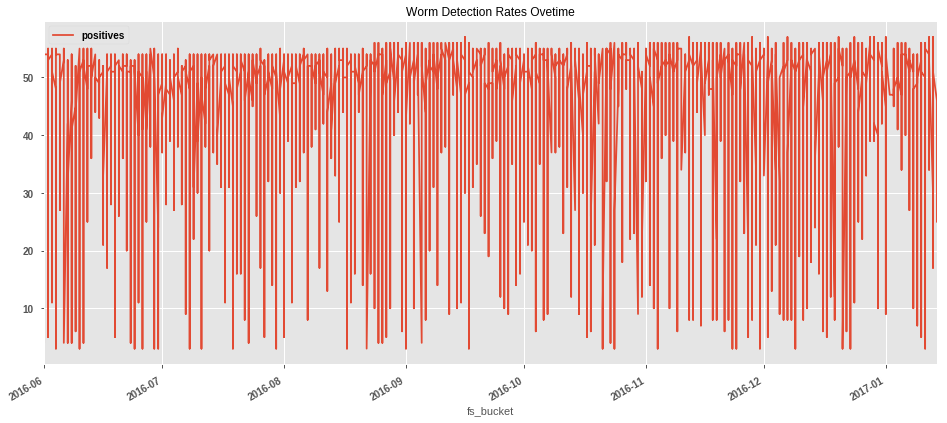

In [5]:
with plt.style.context(('ggplot', 'seaborn-notebook')):
    malware_df[malware_df['type']=='worm'].plot(y='positives',figsize=(16,7), title='Worm Detection Rates Ovetime');

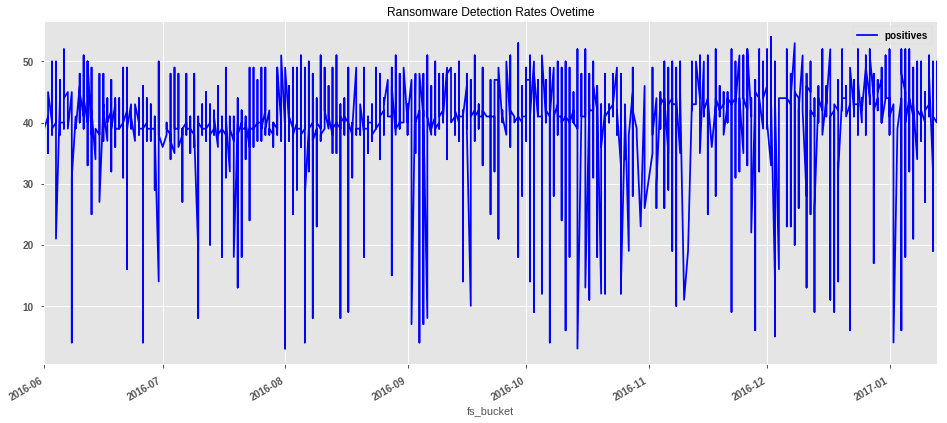

In [4]:
with plt.style.context(('ggplot', 'seaborn-notebook')):
    malware_df[malware_df['type']=='ransomware'].plot(y='positives',figsize=(16,7), title='Ransomware Detection Rates Ovetime', c='blue');

## What trends did you observe in the plot for the relationship between the malware size and vendor detection rates?

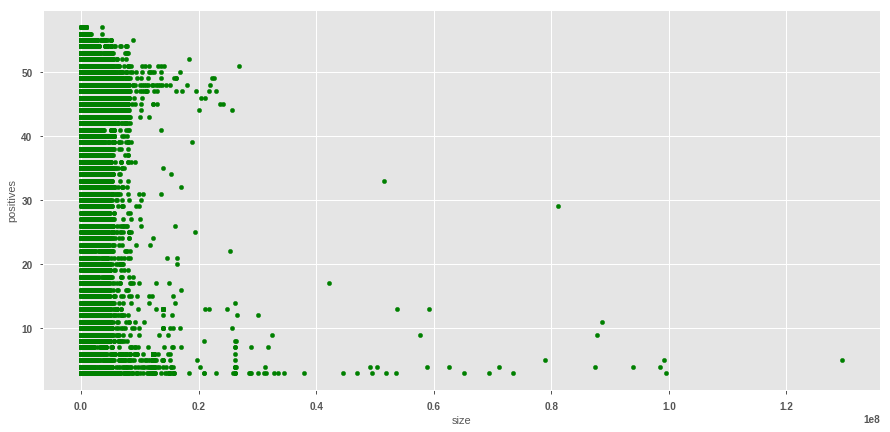

In [75]:
with plt.style.context(('ggplot', 'seaborn-notebook')):
    malware_df.plot(x='size',y='positives', kind='scatter',figsize=(15,7), c='green');

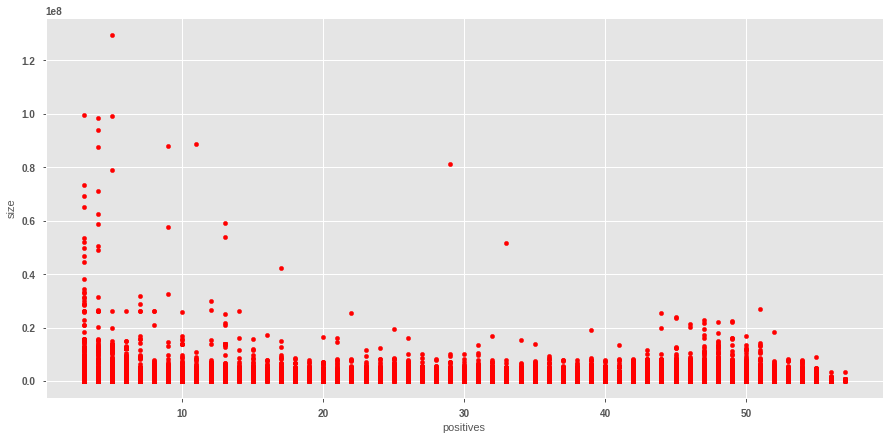

In [76]:
with plt.style.context(('ggplot', 'seaborn-notebook')):
    malware_df.plot(x='positives',y='size', kind='scatter',figsize=(15,7), c='red');

We can see from above 2 graphs that as long as size of malware is less than 0.2 x 1e8 = 20,000,000, it becomes easily for antivirus to detect it. But as soon as it crosses that limit quite less number of malwares are detected with antivirus. We can also say that quite less number of malwares are greater than 20,000,000 size that are detected compared to the ones which are less than that.

We can also see from below findings that number of malware with size less than 20Mn are 37430 and those with greater than that are just 81. Majority of maltwares are of size less than 20 Mn.

In [68]:
malware[malware['size']<20000000].shape

(37430, 4)

In [69]:
malware[malware['size']>20000000].shape

(81, 4)

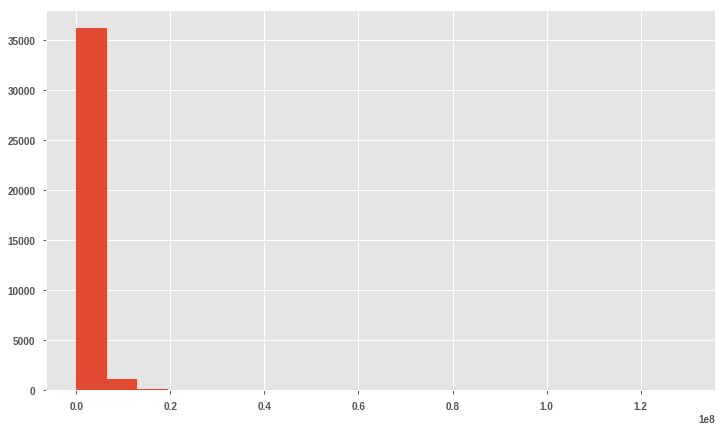

In [71]:
with plt.style.context(('ggplot', 'seaborn-notebook')):
    malware_df['size'].hist(figsize=(12,7),bins=20);